#### K-Mean Clustering

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def cluster(image,k,attempts):
    #RGB image
    original_image = image
    img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
    vectorized = img.reshape((-1,3))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = k #number of clusters
    attempts=attempts #the number of times the algorithm is executed using different initial labelings
    compactness,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center) #convert back into uint8
    #access the labels to regenerate the clustered image
    compactness = center[label.flatten()]
    result_image = compactness.reshape((img.shape))
    
    #visualize the output result
    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(result_image)
    plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.show()
    return result_image

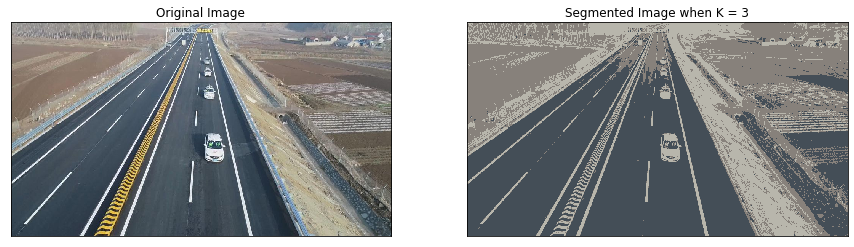

In [48]:
img1= cv2.imread("img/show.jpg")
res1= cluster(img1,3,10)

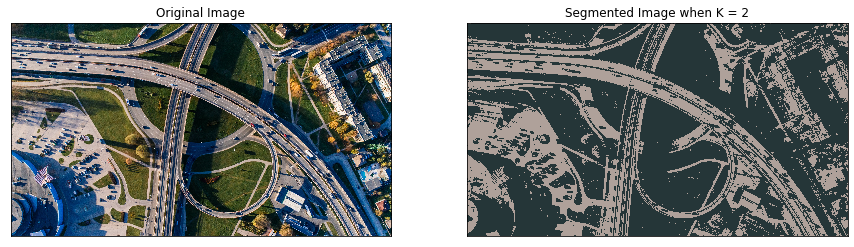

In [54]:
img2= cv2.imread("img/show2.jpeg")
res2= cluster(img2,2,10)

#### Canny edge detection on resultant image

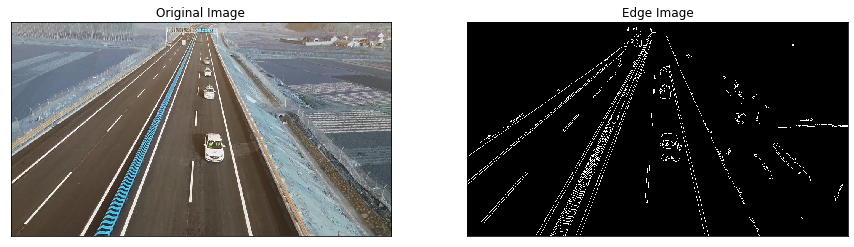

In [49]:
figure_size = 15
edges = cv2.Canny(res1,150,600)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

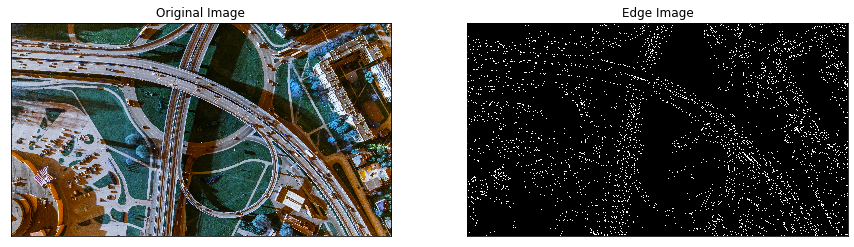

In [55]:
figure_size = 15
edges = cv2.Canny(res2,150,750)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img2)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()